<a href="https://colab.research.google.com/github/1shikapandey/Multiple-Linear-Regression-Model-for-Diabetes-Progression-Prediction/blob/main/Multiple_Linear_Regression_Model_for_Diabetes_Progression_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression

## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import matplotlib.pyplot as plt

## Importing the dataset

In [ ]:
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')
display(X.head())   # or print(X.describe())
print("shape:", X.shape)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


shape: (442, 10)


## Splitting the dataset into the Training set and Test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Building pipeline

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

## Predicting the Test set results

In [ ]:
y_pred = pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("MAE: ", mae)
print("R2:  ", r2)


RMSE: 53.853445836765935
MAE:  42.79409467959994
R2:   0.45260276297191926


## Visualisation

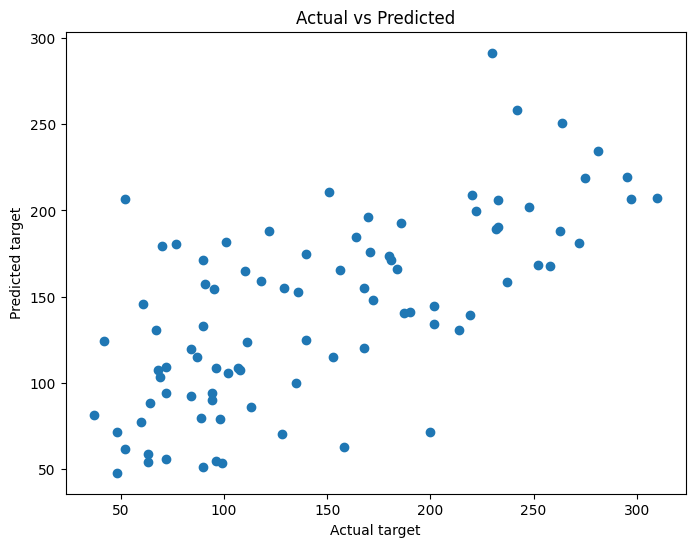

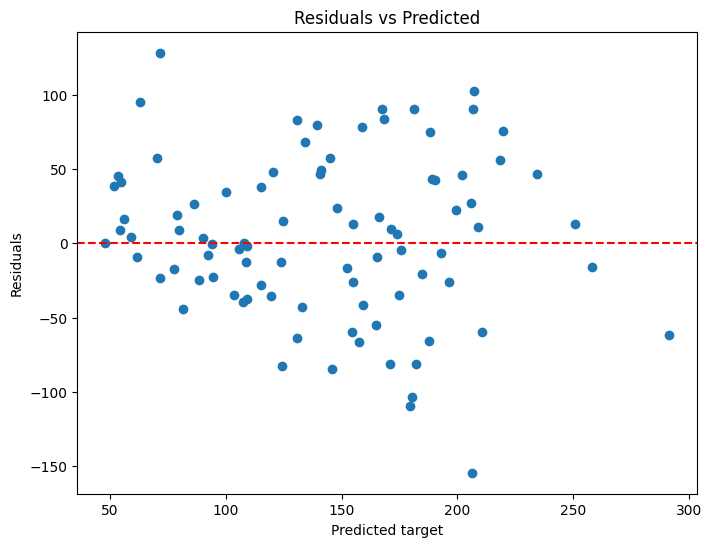

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual target")
plt.ylabel("Predicted target")
plt.title("Actual vs Predicted")
plt.show()

print("\n")

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted target")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()


## Cross Validation

In [ ]:
cv_r2 = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
print("5-fold CV R2:", cv_r2, "mean:", cv_r2.mean())


5-fold CV R2: [0.42955615 0.52259939 0.48268054 0.42649776 0.55024834] mean: 0.48231643590864215


In [ ]:
lr = pipeline.named_steps['lr']
coef_df = pd.DataFrame({'feature': data.feature_names, 'coef': lr.coef_})
display(coef_df.sort_values(by='coef', key=lambda s: s.abs(), ascending=False))


,feature,coef
4,s1,-44.448856
8,s5,35.161195
2,bmi,25.607121
5,s2,24.640954
3,bp,16.828872
7,s4,13.138784
1,sex,-11.511809
6,s3,7.676978
9,s6,2.351364
0,age,1.753758


In [ ]:
joblib.dump(pipeline, '/content/diabetes_lr_pipeline.pkl')

from google.colab import drive
drive.mount('/content/drive')
joblib.dump(pipeline, '/content/drive/My Drive/diabetes_lr_pipeline.pkl')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['/content/drive/My Drive/diabetes_lr_pipeline.pkl']